<a href="https://colab.research.google.com/github/er-jk/CNN/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cnn

In [37]:
#!pip install tensorflow
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models

In [38]:
tf.__version__

'2.6.0'

In [45]:

train_datagen = ImageDataGenerator(rescale=1./255, shear_range= 0.2, zoom_range=0.2, horizontal_flip= True)

training_set = train_datagen.flow_from_directory(directory= "/content/Train", target_size=(64, 64), batch_size=32, class_mode= 'binary')

Found 2408 images belonging to 3 classes.


In [46]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(directory= "/content/Test", target_size=(64, 64), batch_size=32, class_mode= 'binary')

Found 1965 images belonging to 3 classes.


In [41]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

Building the Cnn

In [42]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=2, input_shape = [64,64,3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

Adding a second convolution layer

In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides=2, input_shape = [64,64,3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01), activation='linear'))

Traing CNN

In [47]:
cnn.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])
r = cnn.fit(x = training_set, validation_data= test_set, epochs=10)

Epoch 1/10
76/76 [==============================] - 41s 192ms/step - loss: 0.0337 - accuracy: 0.5677 - val_loss: 0.0124 - val_accuracy: 0.5145
Epoch 2/10
76/76 [==============================] - 15s 193ms/step - loss: 0.0104 - accuracy: 0.5797 - val_loss: 0.0088 - val_accuracy: 0.5145
Epoch 3/10
76/76 [==============================] - 15s 192ms/step - loss: 0.0076 - accuracy: 0.5797 - val_loss: 0.0066 - val_accuracy: 0.5145
Epoch 4/10
76/76 [==============================] - 15s 194ms/step - loss: 0.0059 - accuracy: 0.5797 - val_loss: 0.0052 - val_accuracy: 0.5145
Epoch 5/10
76/76 [==============================] - 14s 190ms/step - loss: 0.0047 - accuracy: 0.5797 - val_loss: 0.0042 - val_accuracy: 0.5145
Epoch 6/10
76/76 [==============================] - 14s 189ms/step - loss: 0.0038 - accuracy: 0.5797 - val_loss: 0.0034 - val_accuracy: 0.5145
Epoch 7/10
76/76 [==============================] - 14s 188ms/step - loss: 0.0031 - accuracy: 0.5797 - val_loss: 0.0028 - val_accuracy: 0.5145

plot the loss

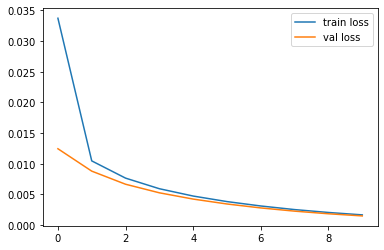

<Figure size 432x288 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

Accuracy Plot

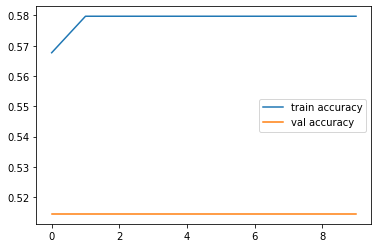

<Figure size 432x288 with 0 Axes>

In [51]:
plt.plot(r.history['accuracy'], label = 'train accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()
plt.savefig('AccuracyVal_acc')